In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
raw = pd.read_csv('train.csv')

## Data Cleaning

In [3]:
raw

,index,Datum,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit
0,1,2017-01-25 17:51:00,23.18,27.2720,721.25,0.004793,1
1,2,2017-01-25 17:51:59,23.15,27.2675,714.00,0.004783,1
2,3,2017-01-25 17:53:00,23.15,27.2450,713.50,0.004779,1
3,4,2017-01-25 17:54:00,23.15,27.2000,708.25,0.004772,1
4,5,2017-01-25 17:55:00,23.10,27.2000,704.50,0.004757,1
...,...,...,...,...,...,...,...
14236,3429,2017-02-03 23:55:59,20.10,33.5900,505.00,0.004890,0
14237,3430,2017-02-03 23:57:00,20.00,33.5000,504.50,0.004847,0
14238,3431,2017-02-03 23:57:59,20.00,33.5000,500.50,0.004847,0
14239,3432,2017-02-03 23:58:59,20.00,33.5000,502.00,0.004847,0


In [4]:
raw.describe()

,index,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit
count,14241.000000,14236.000000,14234.000000,14237.000000,14241.000000,14241.000000
mean,3017.740117,21.005526,25.941076,628.058885,0.003995,0.256513
std,2235.616814,1.148923,4.581677,279.339892,0.000754,0.436724
min,1.000000,19.000000,16.745000,412.750000,0.002674,0.000000
25%,1234.000000,20.290000,22.675000,446.000000,0.003441,0.000000
50%,2420.000000,20.835000,25.726250,512.000000,0.003918,0.000000
75%,4583.000000,21.700000,28.650000,694.750000,0.004524,1.000000
max,8143.000000,24.408333,39.117500,2028.500000,0.006476,1.000000


In [5]:
raw[raw.isna().any(axis=1)]

,index,Datum,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit
487,488,2017-01-26 01:58:00,21.0500,25.0500,NaN,0.003861,0
1030,1031,2017-01-26 11:00:59,NaN,26.5000,1047.000000,0.004359,1
1599,1600,2017-01-26 20:30:00,21.2000,19.3900,NaN,0.003012,0
2507,2508,2017-01-27 11:38:00,21.7000,NaN,801.000000,0.003276,1
3000,3001,2017-01-27 19:51:00,20.5000,NaN,484.000000,0.002869,0
3764,3765,2017-01-28 08:35:00,NaN,19.4725,453.500000,0.002752,0
3981,3982,2017-01-28 12:11:59,22.8900,NaN,453.666667,0.003037,0
5706,5707,2017-01-29 16:57:00,19.4175,NaN,423.000000,0.003772,0
5911,5912,2017-01-29 20:22:00,19.3900,27.5000,NaN,0.003825,0
6537,6538,2017-01-30 06:48:00,NaN,26.2000,461.500000,0.003620,0


Missings Imputen mit mean

In [6]:
lead = raw.loc[:,:'Datum']
tail = raw.loc[:,'Temperatur':]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(tail)
SimpleImputer()
tail = pd.DataFrame(imp.transform(tail), columns = tail.columns)
tail = tail.iloc[:14241,:]
raw = pd.concat([lead, tail],axis=1)
raw.drop(['index'], inplace=True, axis=1)
raw

,Datum,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit
0,2017-01-25 17:51:00,23.18,27.2720,721.25,0.004793,1.0
1,2017-01-25 17:51:59,23.15,27.2675,714.00,0.004783,1.0
2,2017-01-25 17:53:00,23.15,27.2450,713.50,0.004779,1.0
3,2017-01-25 17:54:00,23.15,27.2000,708.25,0.004772,1.0
4,2017-01-25 17:55:00,23.10,27.2000,704.50,0.004757,1.0
...,...,...,...,...,...,...
14236,2017-02-03 23:55:59,20.10,33.5900,505.00,0.004890,0.0
14237,2017-02-03 23:57:00,20.00,33.5000,504.50,0.004847,0.0
14238,2017-02-03 23:57:59,20.00,33.5000,500.50,0.004847,0.0
14239,2017-02-03 23:58:59,20.00,33.5000,502.00,0.004847,0.0


In [7]:
raw[raw.isna().any(axis=1)]

,Datum,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit


In [8]:
raw.dtypes

Datum                object
Temperatur          float64
Luftfeuchtigkeit    float64
CO2                 float64
Wassergehalt        float64
Anwesenheit         float64
dtype: object

In [9]:
raw['Datum'] = raw.Datum.astype('datetime64[ns]')

<AxesSubplot:xlabel='Anwesenheit', ylabel='Temperatur'>

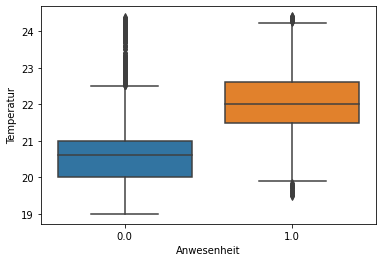

In [10]:
sns.boxplot(y=raw['Temperatur'],x=raw['Anwesenheit'])

<AxesSubplot:xlabel='Anwesenheit', ylabel='Luftfeuchtigkeit'>

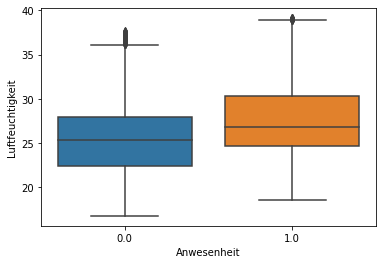

In [11]:
sns.boxplot(y=raw['Luftfeuchtigkeit'], x=raw['Anwesenheit'])

<AxesSubplot:xlabel='Anwesenheit', ylabel='CO2'>

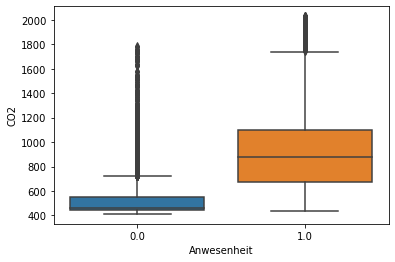

In [12]:
sns.boxplot(y=raw['CO2'],x=raw['Anwesenheit'])

<AxesSubplot:xlabel='Anwesenheit', ylabel='Wassergehalt'>

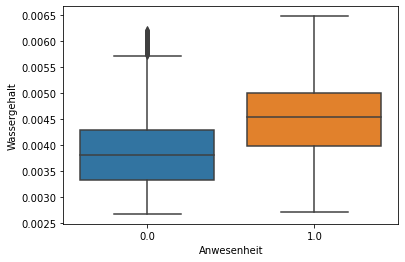

In [13]:
sns.boxplot(y=raw['Wassergehalt'], x=raw['Anwesenheit'])

Ausreißerdefinition nach Boxplots: 1.5 IQA Über oberer Box, da fallen sehr viele Werte drunter.

In [14]:
raw['Wochentag'] = raw.Datum.dt.day_name()

In [15]:
raw['Stunde'] = raw.Datum.dt.hour

In [26]:
raw['Minute'] = raw.Datum.dt.minute

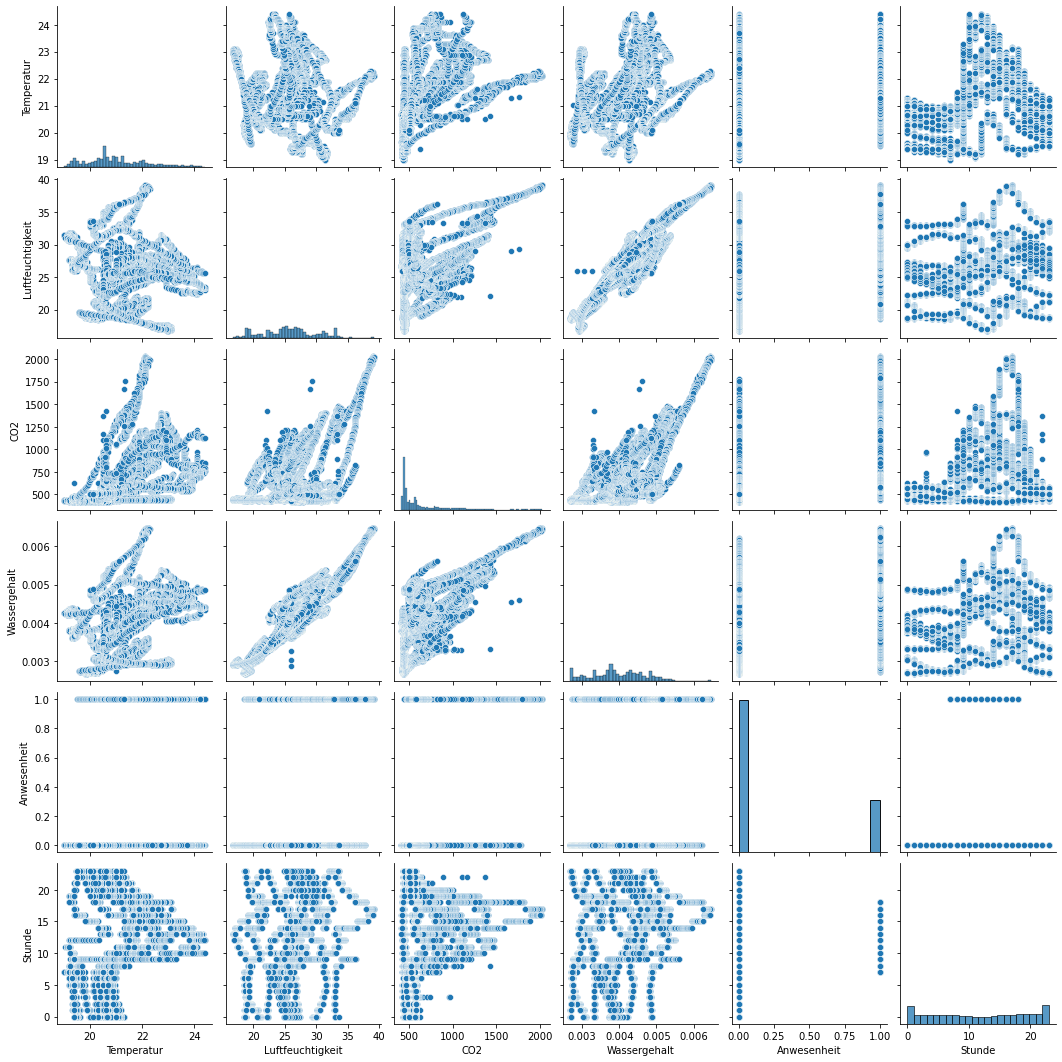

In [16]:
sns.pairplot(raw)

Rechtsschiefe Verteilung von CO2 -> hat auch die meisten Ausreißer

In [17]:
raw.corr()

,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit,Stunde
Temperatur,1.000000,-0.042913,0.545736,0.345093,0.548405,0.226848
Luftfeuchtigkeit,-0.042913,1.000000,0.410889,0.920885,0.172835,0.157645
CO2,0.545736,0.410889,1.000000,0.614993,0.660436,0.186722
Wassergehalt,0.345093,0.920885,0.614993,1.000000,0.384524,0.235736
Anwesenheit,0.548405,0.172835,0.660436,0.384524,1.000000,0.085595
Stunde,0.226848,0.157645,0.186722,0.235736,0.085595,1.000000


- Splate Anwesenheit sollte Angaben über Featurerelevanz geben: CO2,Temperatur,Wassergehalt, Luftfeuchtigkeit
- Wassergehalt abgeleitet aus Temperatur und Luftfeutigkeit -> nur hohe Korrelation mit Luftfeuchtigkeit

In [18]:
raw.groupby('Anwesenheit').mean()

,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Stunde
Anwesenheit,,,,,
0.0,20.635511,25.476078,519.714751,0.003825,11.355686
1.0,22.077989,27.288847,942.087819,0.004489,12.748152


Erkennbare Relevanz aller Features für Unterscheidung Anwesenheit 1/0

<AxesSubplot:xlabel='Stunde', ylabel='count'>

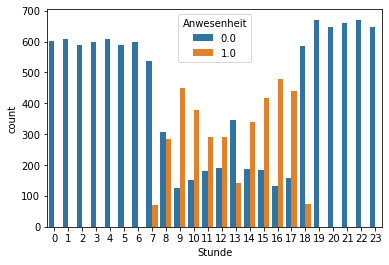

In [19]:
sns.countplot(data=raw, x='Stunde',hue="Anwesenheit")

In [20]:
raw.groupby('Wochentag').mean()

,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit,Stunde
Wochentag,,,,,,
Friday,21.225981,23.723132,581.501042,0.003711,0.375000,11.494444
Monday,20.880841,29.624476,872.428748,0.004548,0.364671,13.549233
Saturday,20.577138,20.654174,443.632963,0.003075,0.000000,11.486468
Sunday,19.510642,29.199576,434.117587,0.004091,0.000000,11.494444
Thursday,21.600399,24.673302,664.249361,0.003945,0.271875,11.494444
Tuesday,21.109308,27.957957,694.449558,0.004336,0.324230,9.441410
Wednesday,21.302498,26.873286,594.390475,0.004219,0.255591,13.477955


Kein Pimmel ist am Wochenende da

In [21]:
raw

,Datum,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Anwesenheit,Wochentag,Stunde
0,2017-01-25 17:51:00,23.18,27.2720,721.25,0.004793,1.0,Wednesday,17
1,2017-01-25 17:51:59,23.15,27.2675,714.00,0.004783,1.0,Wednesday,17
2,2017-01-25 17:53:00,23.15,27.2450,713.50,0.004779,1.0,Wednesday,17
3,2017-01-25 17:54:00,23.15,27.2000,708.25,0.004772,1.0,Wednesday,17
4,2017-01-25 17:55:00,23.10,27.2000,704.50,0.004757,1.0,Wednesday,17
...,...,...,...,...,...,...,...,...
14236,2017-02-03 23:55:59,20.10,33.5900,505.00,0.004890,0.0,Friday,23
14237,2017-02-03 23:57:00,20.00,33.5000,504.50,0.004847,0.0,Friday,23
14238,2017-02-03 23:57:59,20.00,33.5000,500.50,0.004847,0.0,Friday,23
14239,2017-02-03 23:58:59,20.00,33.5000,502.00,0.004847,0.0,Friday,23


In [22]:
Scaling = raw.drop(['Datum','Anwesenheit','Wochentag','Stunde'],axis=1)
scaler = StandardScaler()
Scaling = pd.DataFrame(scaler.fit_transform(Scaling), columns = Scaling.columns)

In [23]:
Rest = raw.drop(Scaling.columns,axis=1)
raw = pd.concat([Scaling,Rest],axis=1)

In [24]:
#raw = pd.get_dummies(raw)

In [27]:
raw

,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Datum,Anwesenheit,Wochentag,Stunde,Minute
0,1.893019,0.290570,0.333670,1.057170,2017-01-25 17:51:00,1.0,Wednesday,17,51
1,1.866902,0.289588,0.307712,1.044514,2017-01-25 17:51:59,1.0,Wednesday,17,51
2,1.866902,0.284675,0.305922,1.039242,2017-01-25 17:53:00,1.0,Wednesday,17,53
3,1.866902,0.274851,0.287124,1.028697,2017-01-25 17:54:00,1.0,Wednesday,17,54
4,1.823374,0.274851,0.273697,1.009455,2017-01-25 17:55:00,1.0,Wednesday,17,55
...,...,...,...,...,...,...,...,...,...
14236,-0.788318,1.669929,-0.440612,1.186332,2017-02-03 23:55:59,0.0,Friday,23,55
14237,-0.875374,1.650280,-0.442402,1.128605,2017-02-03 23:57:00,0.0,Friday,23,57
14238,-0.875374,1.650280,-0.456724,1.128605,2017-02-03 23:57:59,0.0,Friday,23,57
14239,-0.875374,1.650280,-0.451353,1.128605,2017-02-03 23:58:59,0.0,Friday,23,58


# Random Forest
- Hpyerparameter: Baumtiefe (eigentlich nicht), Anzahl Bäume, Anzahl Features

In [38]:
rfor_x = pd.get_dummies(raw.drop(['Datum','Anwesenheit'],axis = 1))

In [30]:
rfor_y = raw['Anwesenheit']

In [39]:
rfor_x

,Temperatur,Luftfeuchtigkeit,CO2,Wassergehalt,Stunde,Minute,Wochentag_Friday,Wochentag_Monday,Wochentag_Saturday,Wochentag_Sunday,Wochentag_Thursday,Wochentag_Tuesday,Wochentag_Wednesday
0,1.893019,0.290570,0.333670,1.057170,17,51,0,0,0,0,0,0,1
1,1.866902,0.289588,0.307712,1.044514,17,51,0,0,0,0,0,0,1
2,1.866902,0.284675,0.305922,1.039242,17,53,0,0,0,0,0,0,1
3,1.866902,0.274851,0.287124,1.028697,17,54,0,0,0,0,0,0,1
4,1.823374,0.274851,0.273697,1.009455,17,55,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14236,-0.788318,1.669929,-0.440612,1.186332,23,55,1,0,0,0,0,0,0
14237,-0.875374,1.650280,-0.442402,1.128605,23,57,1,0,0,0,0,0,0
14238,-0.875374,1.650280,-0.456724,1.128605,23,57,1,0,0,0,0,0,0
14239,-0.875374,1.650280,-0.451353,1.128605,23,58,1,0,0,0,0,0,0


In [33]:
rfor_y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14236    0.0
14237    0.0
14238    0.0
14239    0.0
14240    0.0
Name: Anwesenheit, Length: 14241, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(rfor_x, rfor_y, test_size=0.2, random_state=42)

Training with default Hyperparameters

In [57]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Train Accuracy: ", rf.score(X_train, y_train), "Test Accuracy: ", rf.score(X_test, y_test))
print("Recall: ", recall_score(y_test, y_pred), "Precision: ", precision_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Feature Importance: \n", pd.Series(rf.feature_importances_, index=rfor_x.columns).sort_values(ascending=False)) 

Train Accuracy:  1.0 Test Accuracy:  0.994032994032994
Recall:  0.9877216916780355 Precision:  0.9890710382513661
Confusion Matrix: 
 [[2108    8]
 [   9  724]]
Feature Importance: 
 CO2                    0.299778
Stunde                 0.236054
Temperatur             0.173087
Wassergehalt           0.104145
Luftfeuchtigkeit       0.080553
Minute                 0.034770
Wochentag_Friday       0.017386
Wochentag_Saturday     0.014670
Wochentag_Thursday     0.012646
Wochentag_Sunday       0.011683
Wochentag_Monday       0.005606
Wochentag_Tuesday      0.005003
Wochentag_Wednesday    0.004620
dtype: float64


In [60]:
from itertools import product
n_estimators = [10,100,200] #Default is 100
max_features = ['sqrt','log2'] #Default ist sqrt, log2 other option
max_depth = [None,2,4,6] #Default is None, means depth to pure leaves

for e, f, d in product(n_estimators, max_features, max_depth):
    rf = RandomForestClassifier(n_estimators = e,
                                criterion = 'entropy',
                                max_features = f,
                                max_depth = d,
                                random_state = None) # When given, keeps Bootstrap & Feature selection constant -> meine Logik: sollte auf False bleiben, damit CV erspart bleibt? (random Bootstraps bei jedem Baum?)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    print(f'\n \n RandomForest mit Hyperparametern: \n n_trees: {e}, n_features: {f}, Tiefe: {d}')
    print("Train Accuracy: ", rf.score(X_train, y_train), "Test Accuracy: ", rf.score(X_test, y_test))
    print("Recall: ", recall_score(y_test, y_pred), "Precision: ", precision_score(y_test, y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
    print("Feature Importance: \n", pd.Series(rf.feature_importances_, index=rfor_x.columns).sort_values(ascending=False)) 


 
 RandomForest mit Hyperparametern: 
 n_trees: 10, n_features: sqrt, Tiefe: None
Train Accuracy:  0.9994733146067416 Test Accuracy:  0.991926991926992
Recall:  0.9809004092769441 Precision:  0.9876373626373627
Confusion Matrix: 
 [[2107    9]
 [  14  719]]
Feature Importance: 
 CO2                    0.287126
Stunde                 0.260576
Temperatur             0.168601
Wassergehalt           0.102466
Luftfeuchtigkeit       0.092647
Minute                 0.032438
Wochentag_Saturday     0.014207
Wochentag_Thursday     0.012573
Wochentag_Friday       0.012496
Wochentag_Monday       0.007487
Wochentag_Tuesday      0.003972
Wochentag_Wednesday    0.003217
Wochentag_Sunday       0.002195
dtype: float64

 
 RandomForest mit Hyperparametern: 
 n_trees: 10, n_features: sqrt, Tiefe: 2
Train Accuracy:  0.9066011235955056 Test Accuracy:  0.9175149175149175
Recall:  0.7830832196452933 Precision:  0.8830769230769231
Confusion Matrix: 
 [[2040   76]
 [ 159  574]]
Feature Importance: 
 Stunde   